# Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Base de risco de crédito

In [76]:
with open('/content/drive/MyDrive/Machine Learning/Classificação/risco_credito.pkl', 'rb') as f:
  X_risco,y_risco = pickle.load(f)

# Criar árvore de decisão
arvore_risco = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_risco.fit(X_risco, y_risco)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [77]:
# Importância de cada previsor dentro da árvore de decisão
print(arvore_risco.feature_importances_)

[0.3362078  0.14179499 0.03885431 0.4831429 ]


In [ ]:
previsores = ['história', 'dívida', 'garantia', 'renda']
figuras, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco, feature_names=previsores, class_names = arvore_risco.classes_, filled=True);

In [17]:
# Usando o mesmo exemplo do Naive Bayes
previsoes = arvore_risco.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

### Base crédito - 98,20%

In [30]:
with open('/content/drive/MyDrive/Machine Learning/Classificação/credit.pkl', 'rb') as f:
  X_credit_treinamento,y_credit_treinamento,X_credit_teste, y_credit_teste = pickle.load(f)

# Criar árvore de decisão
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
previsoes_credit = arvore_credit.predict(X_credit_teste)

In [32]:
accuracy_score(y_credit_teste, previsoes_credit)

0.982

In [ ]:
previsores_credit = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsores_credit, class_names = ['0','1'], filled=True);
fig.savefig('arvore_credit.png')

### Base Census - 81,04%

In [113]:
with open('/content/drive/MyDrive/Machine Learning/Classificação/census.pkl', 'rb') as f:
  X_census_treinamento,y_census_treinamento,X_census_teste, y_census_teste = pickle.load(f)

# Criar árvore de decisão
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [114]:
previsoes_census = arvore_census.predict(X_census_teste)

In [ ]:
accuracy_score(y_census_teste, previsoes_census)

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes_census))

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Base Credit Data - 98,40%

In [107]:
with open('/content/drive/MyDrive/Machine Learning/Classificação/credit.pkl', 'rb') as f:
  X_credit_treinamento,y_credit_treinamento,X_credit_teste, y_credit_teste = pickle.load(f)

In [108]:
# Fazendo o Random Forest; primeiro parametro são quantas arvores vou ter e o segundo parametro é critério entropy
random_forest_credit = RandomForestClassifier(n_estimators=40,criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [109]:
previsao_credit_RF = random_forest_credit.predict(X_credit_teste)

In [ ]:
accuracy_score(y_credit_teste, previsao_credit_RF)

In [ ]:
print(classification_report(y_credit_teste, previsao_credit_RF))

In [ ]:
cm_credit = ConfusionMatrix(random_forest_credit)
cm_credit.fit(X_credit_treinamento, y_credit_treinamento)
cm_credit.score(X_credit_teste,y_credit_teste)

### Base Census - 85,07%


In [124]:
with open('/content/drive/MyDrive/Machine Learning/Classificação/census.pkl', 'rb') as f:
  X_census_treinamento,y_census_treinamento,X_census_teste, y_census_teste = pickle.load(f)

In [152]:
random_forest_census = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [153]:
previsao_census_RF = random_forest_census.predict(X_census_teste)

In [154]:
accuracy_score(y_census_teste, previsao_census_RF)

0.8507676560900717

In [155]:
print(classification_report(y_census_teste, previsao_census_RF))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



0.8507676560900717

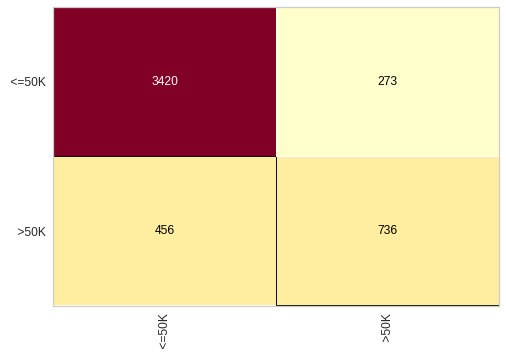

In [156]:
cm_census = ConfusionMatrix(random_forest_census)
cm_census.fit(X_census_treinamento, y_census_treinamento)
cm_census.score(X_census_teste,y_census_teste)